# 1. Import Dependencies

# 2. Load Environment

In [7]:
import os
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

C:\Users\iDLaber\miniconda3\envs\gops\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
environment_name = 'CartPole-v0'
env = gym.make(environment_name)

In [9]:
episodes=5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0    
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score += reward
    print('Episode:{} Score:{}'.format(episode, reward))
env.close()

Episode:1 Score:1.0
Episode:2 Score:1.0
Episode:3 Score:1.0
Episode:4 Score:1.0
Episode:5 Score:1.0


## Understanding The Environment

In [10]:
env.action_space

Discrete(2)

In [11]:
env.action_space.sample()

0

In [12]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [13]:
env.observation_space.sample()

array([-3.3507087e+00, -1.3760190e+38,  5.0440612e-03,  2.9252812e+38],
      dtype=float32)

# 3. Train an RL Model

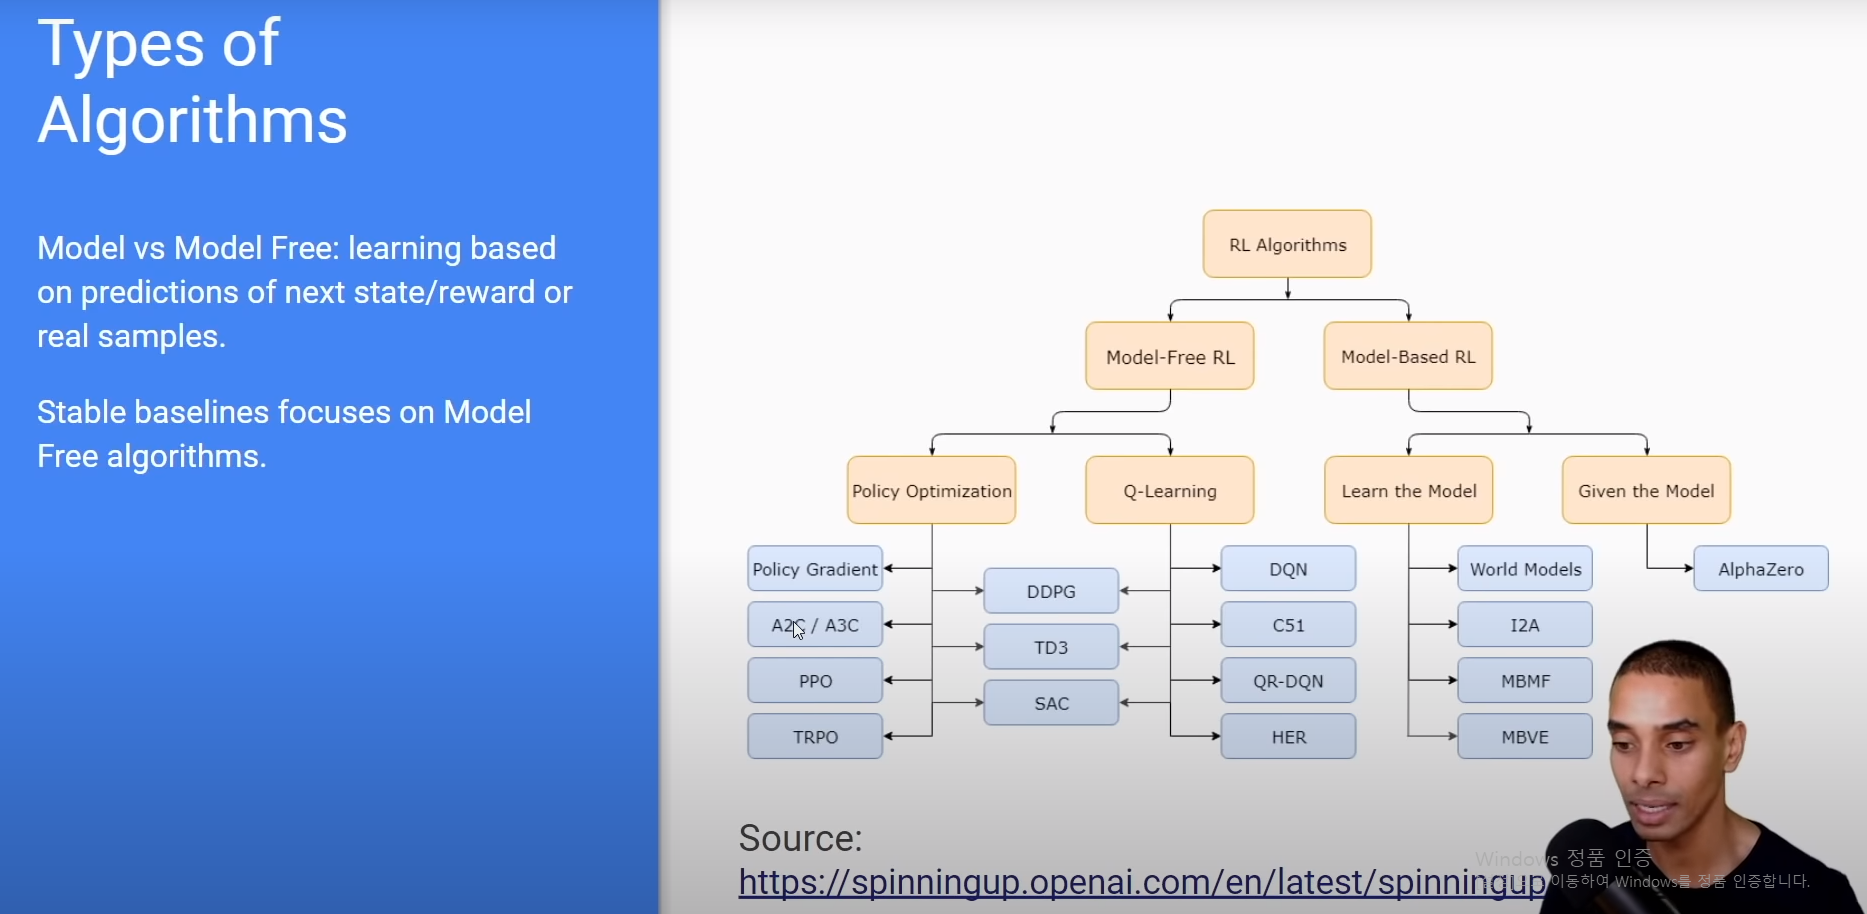

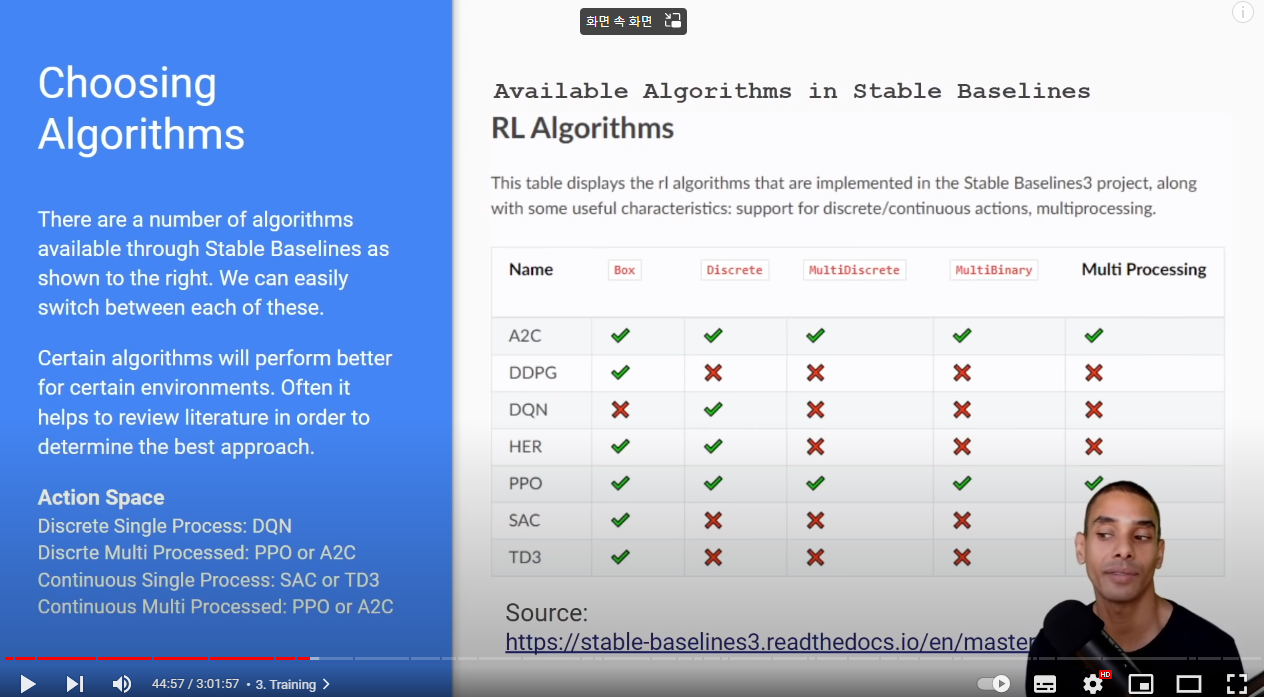

In [14]:
# Make your first directories first
log_path = os.path.join('Training','Logs')

In [15]:
log_path

'Training\\Logs'

In [16]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda:env])
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log = log_path)
# MlpPolicy: Dense NN

Using cpu device


In [17]:
PPO??

In [18]:
# Model Complexity에 따라 적합한 timesteps을 정해준다
model.learn(total_timesteps = 20000)

Logging to Training\Logs\PPO_8
-----------------------------
| time/              |      |
|    fps             | 574  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 727          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0085410755 |
|    clip_fraction        | 0.0976       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.686       |
|    explained_variance   | 0.00119      |
|    learning_rate        | 0.0003       |
|    loss                 | 6.43         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0148      |
|    value_loss           | 51.7         |
----------------------------

# 4. Save and Reload Model

In [19]:
PPO_path = os.path.join('Training', 'Saved Models', 'PPO_Model_Cartpole')

In [20]:
model.save(PPO_path)

In [21]:
PPO_path

'Training\\Saved Models\\PPO_Model_Cartpole'

In [22]:
# bring the PPO model before
# model = PPO.load(PPO_path, env=env)

# 5. Evaluation

강화학습을 진행하는데 있어서 우리는 강화학습 평가지표를 만들 필요가 있다.
이는 Evaluation Metric을 손수 제작함으로써 가능해진다.

In [23]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)
# (200.0, 0.0)
# reward:200, Standard Deviation:0.0

C:\Users\iDLaber\miniconda3\envs\gops\lib\site-packages\stable_baselines3\common\evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


(200.0, 0.0)

In [24]:
env.close()

# 6. Test Model

In [25]:
obs = env.reset()
action, _ = model.predict(obs)

In [26]:
action

array([1], dtype=int64)

In [27]:
episodes = 5
for episode in range(1, episodes+1):
    obs = env.reset()
    done = False
    score = 0
    
    while not done:
        env.render()
        action, _ = model.predict(obs)
        n_state, reward, done, info = env.step(action)
        score += reward
    print('Episode:{}, Score:{}'.format(episode, score))
# env.close()

Episode:1, Score:[17.]
Episode:2, Score:[22.]
Episode:3, Score:[15.]
Episode:4, Score:[13.]
Episode:5, Score:[20.]


In [28]:
model.predict??

In [29]:
action, _ = model.predict(obs)

In [30]:
env.step(action)

(array([[-1.8810732e-02,  2.1569839e-01, -2.0234475e-04, -2.7969894e-01]],
       dtype=float32),
 array([1.], dtype=float32),
 array([False]),
 [{}])

# 7. Viewing Logs in Tensorboard

In [31]:
training_log_path = os.path.join(log_path, 'PPO_4')

In [32]:
training_log_path

'Training\\Logs\\PPO_4'

In [33]:
# !tensorboard --logdir=training_log_path
# 이건 직접 커맨드 들어가야 함.
# cd로 PPO 폴더 들어가서
# tensorboard --logdir=.


# 8. Adding a callback to the training stage

In [34]:
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

In [35]:
save_path = os.path.join('Training', 'Saved Models')

In [39]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold = 200, verbose=1)
# 200점에 도달하면 멈추도록 한다.
eval_callback = EvalCallback(env,callback_on_new_best = stop_callback,eval_freq = 10000,
                            best_model_save_path = save_path,
                            verbose = 1)
# 10000번마다 평가를 진행하고, 이 평가점수가 200이면 스톱.

In [40]:
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log = log_path)

Using cpu device


In [41]:
model.learn(total_timesteps = 20000, callback=eval_callback)

Logging to Training\Logs\PPO_9
-----------------------------
| time/              |      |
|    fps             | 1706 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1271        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008567046 |
|    clip_fraction        | 0.0805      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_variance   | -0.00581    |
|    learning_rate        | 0.0003      |
|    loss                 | 7.15        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0129     |
|    value_loss           | 50          |
-----------------------------------------
---

# 9. Changing Policies

In [43]:
net_arch = [dict(pi=[128,128,128,128], vf=[128,128,128,128])]

In [44]:
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log = log_path, policy_kwargs={'net_arch':net_arch})

Using cpu device


In [45]:
model.learn(total_timesteps=20000, callback=eval_callback)

Logging to Training\Logs\PPO_10
-----------------------------
| time/              |      |
|    fps             | 1507 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 933        |
|    iterations           | 2          |
|    time_elapsed         | 4          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01630058 |
|    clip_fraction        | 0.253      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.681     |
|    explained_variance   | -0.00431   |
|    learning_rate        | 0.0003     |
|    loss                 | 3.82       |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.0298    |
|    value_loss           | 21.5       |
----------------------------------------
--------------------

# 10. Using an Alternate Algorithm

In [46]:
from stable_baselines3 import DQN

In [47]:
model = DQN('MlpPolicy', env, verbose=1, tensorboard_log = log_path)

Using cpu device


In [48]:
model.learn(total_timesteps = 20000)

Logging to Training\Logs\DQN_1
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.966    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 704      |
|    time_elapsed     | 0        |
|    total_timesteps  | 72       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.921    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1035     |
|    time_elapsed     | 0        |
|    total_timesteps  | 167      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.892    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 1137     |
|    time_elapsed     | 0        |
|    total_timesteps  | 228      |
----------------------------------
------------------------

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 108      |
|    fps              | 2726     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2316     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 112      |
|    fps              | 2758     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2423     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 116      |
|    fps              | 2795     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2515     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 216      |
|    fps              | 2965     |
|    time_elapsed     | 1        |
|    total_timesteps  | 4660     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 220      |
|    fps              | 2986     |
|    time_elapsed     | 1        |
|    total_timesteps  | 4755     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 224      |
|    fps              | 2966     |
|    time_elapsed     | 1        |
|    total_timesteps  | 4855     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 3033     |
|    time_elapsed     | 2        |
|    total_timesteps  | 6958     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 3032     |
|    time_elapsed     | 2        |
|    total_timesteps  | 7031     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 3026     |
|    time_elapsed     | 2        |
|    total_timesteps  | 7085     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 432      |
|    fps              | 3103     |
|    time_elapsed     | 3        |
|    total_timesteps  | 9399     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 436      |
|    fps              | 3114     |
|    time_elapsed     | 3        |
|    total_timesteps  | 9518     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 440      |
|    fps              | 3117     |
|    time_elapsed     | 3        |
|    total_timesteps  | 9585     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 540      |
|    fps              | 3017     |
|    time_elapsed     | 3        |
|    total_timesteps  | 11861    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 544      |
|    fps              | 3017     |
|    time_elapsed     | 3        |
|    total_timesteps  | 11970    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 548      |
|    fps              | 3011     |
|    time_elapsed     | 4        |
|    total_timesteps  | 12068    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 648      |
|    fps              | 3002     |
|    time_elapsed     | 4        |
|    total_timesteps  | 14194    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 652      |
|    fps              | 3005     |
|    time_elapsed     | 4        |
|    total_timesteps  | 14284    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 656      |
|    fps              | 3006     |
|    time_elapsed     | 4        |
|    total_timesteps  | 14362    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 756      |
|    fps              | 3027     |
|    time_elapsed     | 5        |
|    total_timesteps  | 16533    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 760      |
|    fps              | 3028     |
|    time_elapsed     | 5        |
|    total_timesteps  | 16617    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 764      |
|    fps              | 3025     |
|    time_elapsed     | 5        |
|    total_timesteps  | 16693    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 864      |
|    fps              | 3050     |
|    time_elapsed     | 6        |
|    total_timesteps  | 18951    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 868      |
|    fps              | 3053     |
|    time_elapsed     | 6        |
|    total_timesteps  | 19037    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 872      |
|    fps              | 3057     |
|    time_elapsed     | 6        |
|    total_timesteps  | 19151    |
----------------------------------
----------------------------------
| rollout/          